In [61]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [63]:
len(data)

13871

In [64]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [65]:
sample_data = data['text'][:1000]

In [66]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [67]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [68]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [-0.04570356 -0.13481034 -0.00585221  0.09970213 -0.14560778 -0.10950535
 -0.02145281  0.11973251 -0.29913566  0.1447762   0.04704024  0.00533354
  0.22721416  0.00771187  0.18161578  0.03903988  0.27906573  0.06280847
 -0.09694806 -0.25191087]
[('476', 0.8775146007537842), ('931', 0.8294670581817627), ('507', 0.7936525344848633), ('809', 0.7346881628036499), ('854', 0.715202271938324), ('614', 0.7131681442260742), ('227', 0.6998825073242188), ('562', 0.6955649256706238), ('823', 0.6889116764068604), ('665', 0.6857958436012268)]
[-1.2551824   4.382986    3.6685548   4.1118307   1.6492672  -2.2908318
 -4.5963674  -1.946818    0.8700606   3.111593    6.8232703  -1.799706
  0.26830083  2.8625724   5.3652177  -3.0638914   8.432919   -1.5932634
 -2.0087857  -5.09374   ]


In [69]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [70]:
list(doc_vectors.values())[1]

array([-2.1901699e-03, -4.0407065e-02,  5.4410958e-01,  1.6236265e-01,
       -2.2371593e-01, -6.8037108e-02,  1.2914297e-01,  4.1738340e-01,
       -3.5424733e-01,  1.5026791e-01,  2.9835629e-01, -1.6991559e-01,
        2.2914787e-01, -6.6772237e-04,  5.0430709e-01,  2.4373278e-01,
        7.7097017e-01, -1.7041789e-01, -1.8813859e-01, -4.5671558e-01],
      dtype=float32)

In [71]:
#perform k-means clustering on embedded documents

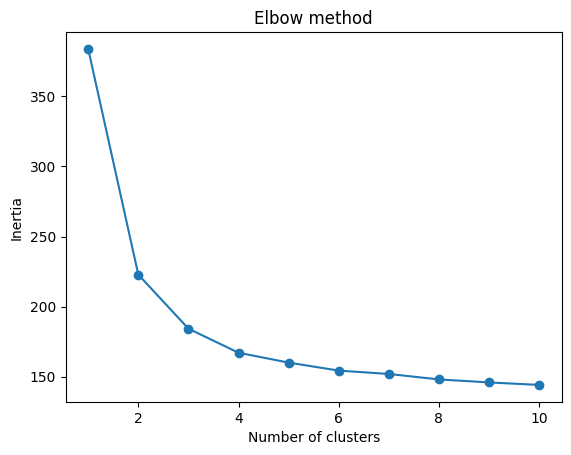

In [72]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [73]:
num_clusters = 3

In [74]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [75]:
#find centroids. compute bigram closest to centroid

In [76]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.1187075 ,  0.0165885 ,  0.3541494 ,  0.2434972 , -0.27758117,
        -0.19880281,  0.24993448,  0.58171021, -0.70774663,  0.17143248,
         0.40019418, -0.22635027,  0.49234185,  0.03055636,  0.5241785 ,
         0.34898508,  0.82526789, -0.11360455, -0.43713596, -0.58490673],
       [ 0.02764952,  0.01263449,  0.12690055,  0.08563713, -0.10503256,
        -0.05385537,  0.09754335,  0.19858356, -0.2427091 ,  0.05997447,
         0.14535562, -0.07412708,  0.18567919,  0.00638358,  0.18530369,
         0.1390482 ,  0.29769118, -0.04506616, -0.16010603, -0.20940753],
       [ 0.06875892,  0.0156105 ,  0.25115775,  0.16326616, -0.19635152,
        -0.12338841,  0.17929027,  0.38549265, -0.47113966,  0.12132132,
         0.27425729, -0.14357421,  0.3249151 ,  0.01663157,  0.35829447,
         0.24245116,  0.55870083, -0.08441955, -0.29300651, -0.40485638]])

In [77]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [78]:
#a selection of poliical words 
political_words = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [79]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_words)):
    for j in range(i+1,len(political_words)):
        bigrams.append(political_words[i] + " " + political_words[j])

In [80]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [81]:
list(bigram_vecs.values())[0]

array([ 0.02639628,  0.06189057,  0.0063163 , -0.03823245,  0.00256213,
       -0.05022115, -0.04520977,  0.08455602, -0.03795823, -0.00445758,
        0.03554893, -0.06146124,  0.08253924, -0.00668422,  0.05986781,
        0.0120142 ,  0.05761003,  0.02314859, -0.05157363, -0.06430284],
      dtype=float32)

In [82]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [83]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [84]:
nearest_bigram_to_centroid

[('executive deficit', -0.7768425218820643),
 ('executive deficit', -0.7741523691110449),
 ('executive deficit', -0.7750390872877931)]

In [85]:
#use TF-IDF of simply do a frequency count of words occuring in each centroid

In [86]:
labeled_data = zip(sample_data,kmeans.labels_)

In [87]:
#build vocabulary
cluster_vocab = [[] for centroid in centroids]
for doc, label in list(labeled_data):
    cluster_vocab[label] += word_tokenize(doc.lower())
cluster_vocab = [list(set(vocab)) for vocab in cluster_vocab]

In [88]:
len(cluster_vocab[0])

1718

In [89]:
from collections import Counter

In [90]:
Counter(cluster_vocab[0])

Counter({'//t.co/v7pqn2qr84': 1,
         'dedicated': 1,
         'build': 1,
         'shadowbard': 1,
         'ppl': 1,
         'abortion': 1,
         're-watching': 1,
         'an': 1,
         'anyway': 1,
         'sta…': 1,
         'buy': 1,
         '//t.co/gs5eodhvhu': 1,
         'themselves': 1,
         'watch': 1,
         'vp': 1,
         'voting': 1,
         'close': 1,
         'portion': 1,
         '20': 1,
         'pose': 1,
         'retiring.and': 1,
         'case…': 1,
         'forget…': 1,
         'affordable': 1,
         'poodles': 1,
         'rescind': 1,
         'party': 1,
         'hp': 1,
         'tense': 1,
         'completely': 1,
         'rape': 1,
         'appearance': 1,
         'sen': 1,
         'megynkelly': 1,
         'millions': 1,
         'politically': 1,
         'david': 1,
         'again': 1,
         'hey': 1,
         'hangover': 1,
         "'disgusting": 1,
         'ohioans': 1,
         'percent': 1,
         'acto